In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Import all the necessary library in the cell below

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sta
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression

**Problem 1**

1- Load the titanic dataset from the seaborn package.

In [5]:
data = sns.load_dataset("titanic")

2- how many columns in this dataset?

In [6]:
data.shape[1]

15

3- list the names of all columns and describe the datatype of each column? 

In [7]:
print("name of columns",data.columns)
data.info()

name of columns Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 1

4- Count the number of missing values in each column

In [8]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5- Clean the dataset by removing every record that contains a missing value? 

In [9]:
data.dropna(axis=0,inplace=True)

6 - Compute the average age of females and males who survived? 

In [10]:
d1=data.loc[(data['sex'] == 'female') & (data['survived'] == 1)].age.mean()
d2=data.loc[(data['sex'] == 'male') & (data['survived'] == 1)].age.mean()
print("The average of female is",round((d1),1),"years old")
print("The average of male is",round((d2),1),"years old")

The average of female is 33.1 years old
The average of male is 32.6 years old


6 - Count how many people survived by age and sex. Display the result as DataFrame. 

In [11]:
data[data["survived"]==1].groupby(by=["sex", "age"]).count()['survived'].to_frame()

survived
sex    age           
female 4.0          2
       14.0         1
       15.0         1
       16.0         3
       17.0         2
...               ...
male   51.0         1
       52.0         1
       56.0         1
       60.0         1
       80.0         1

[68 rows x 1 columns]

7- Build a logistic regression model using the pclass, age, parch, sex, and fare columns as explanatory variables and the survived column as response variable

In [12]:
lb = LabelBinarizer()
data.sex = lb.fit_transform(data.sex)
data.sex.unique()
X = data[["pclass", "age", "parch","sex","fare"]].values.reshape(-1,5)
y = data["survived"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

8- Measure its performance using accuracy score and display the confusion matrix. 

[[ 6  4]
 [ 2 25]]


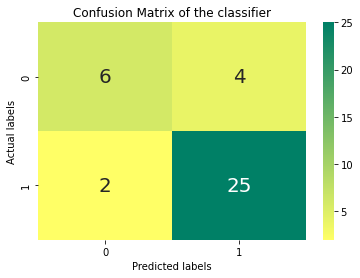

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(data.survived))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(data.survived),
           yticklabels=np.unique(data.survived))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

9- Interpret the result

In [14]:
AP00=6
AP01=4
AP10=2
AP11=25
Accuracy = round(((AP00+AP11)/(AP00+AP01+AP10+AP11))*100)
Misclassification = 100-Accuracy
Precision = round(((AP11)/(AP10+AP11))*100)
Sensitivity = round(((AP11)/(AP01+AP11))*100)
Specificity = round(((AP00)/(AP00+AP10))*100)
print("The Accuracy of the model produced by the confusion matrix of the classifer is",Accuracy,"%")
print("\nThe Misclassification of the model produced by the confusion matrix of the classifer is",Misclassification,"%")
print("\nThe Precision of the model produced by the confusion matrix of the classifer is",Precision,"%")
print("\nThe Sensitivity of the model produced by the confusion matrix of the classifer is",Sensitivity,"%")
print("\nThe Specificity of the model produced by the confusion matrix of the classifer is",Specificity,"%")

The Accuracy of the model produced by the confusion matrix of the classifer is 84 %

The Misclassification of the model produced by the confusion matrix of the classifer is 16 %

The Precision of the model produced by the confusion matrix of the classifer is 93 %

The Sensitivity of the model produced by the confusion matrix of the classifer is 86 %

The Specificity of the model produced by the confusion matrix of the classifer is 75 %


A confusion matrix is a summary of prediction results on a classification problem. 
Confusion matrices have two types of errors: Type I and Type II. If the accuracy of 
the classifier is considered acceptable, the classifier can be used to classify future
data tuples for which the class label is not known. 
Since the Accuracy of the classifier and the precision of the classifier is relatively high, 
the we say thatthe classifier can also be used to classify future data, even if the calss label is unknown.

**Problem 2**

Let assume we have the one dimensional process model
\begin{equation}
x_i = \alpha x_{i-1}+\delta_i, \text{ with }\delta_i\thicksim \mathcal{N}(0,q^2),\;\; i = 1,\cdots,N ,
\end{equation}
and $x_0\thicksim \mathcal{N}(\mu,r^2)$. Assume the data model is 

\begin{equation}
y_i = h_i x_{i}+\epsilon_i, \text{ with }\epsilon_i\thicksim \mathcal{N}(0,s^2),\;\; i = 1,\cdots,N ,
\end{equation}
where
$$
h_i =\begin{cases}
 1, \;\;& i=&1,\cdots,N_1\\
0.1, & i=&N_1+1,\cdots, N_2\\
0.9, & i=&N_2+1,\cdots,N
\end{cases}.
$$
Note that $N_1<N_2<N$.

1- Write Python function called **Process** that takes $\alpha, N, q, \mu, r$ and return the array $x$ of the $x_i, i=0,\cdots,N$.

In [15]:
def Process(a,N,q,u,r):
    x=np.zeros(N+1)
    x[0]=np.random.normal(u,r)
    for i in range(1,N+1):
        x[i]=a*x[i-1]+np.random.normal(0,q)
    return x

2- Write Python function called **Data** that takes array $x$ of the $x_i$, $s, N_1, N_2, N$ and return the array $y$ of $y_i,i=1,\cdots,N$

In [16]:

def Data(x,s,N1,N2,N):
    global h
    h=np.ones(N)
    h[N1+1:N2+1]=0.1*h[N1+1:N2+1]
    h[N2+1:]=0.9*h[N2+1:]
    for i in range(N):
        y=h*x[1:]+np.random.normal(0,s,N)
    return y

3- Write a program to plot the data on the same graph as the process model, for \begin{equation}
r = 0.1, q=0.4, s=0.9, \mu = 0.01, h= 1, \alpha = 0.8,N = 50,  N_1 = 20,  N_2 = 30
\end{equation}

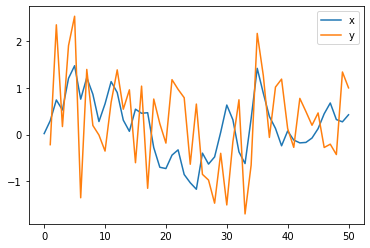

In [17]:

r=0.1
q=0.4
s=0.9
u=0.01
a=0.8
N=50
N1=20
N2=30

x=Process(a,N,q,u,r)
y= Data(x,s,N1,N2,N)
plt.plot(np.arange(N+1),x,label="x")
plt.plot(np.arange(1,N+1),y,label="y")
plt.legend()
plt.show()

4- Use the general formulas given for the Kalman filter to find the one dimensional formulas for

\begin{equation}
\mu_{1\mid 0}, \sigma_{1\mid 0}, k_1, \mu_{1\mid 1},\sigma_{1\mid 1},
\end{equation}
in term of $\alpha, q,r,s,\mu$ and $y_1$ (write the answer as markdown)

$$\mu_{1|0}=\alpha \mu$$
$$\sigma_{1\mid 0}=q+\alpha^2 r$$
$$k_1=(q+\alpha^2 r)(q+\alpha^2 r+s)^{-1}$$
$$\mu_{1\mid 1}=\alpha \mu + (q+\alpha^2 r)(q+\alpha^2 r+s)^{-1}(y_1-\alpha \mu)$$
$$\sigma_{1\mid 1}=(1-(q+\alpha^2 r)(q+\alpha^2 r+s)^{-1})(q+\alpha^2 r)$$

5- Using the general formulas given for the Kalman filter, write Python program to calculate
\begin{equation}
\mu_{i\mid i-1}, \sigma_{i\mid i-1}, k_i, \mu_{i\mid i},\sigma_{i\mid i},
\end{equation}
for $i=1,\cdots, N$. Be sure to
initialize the loop over $i$. Hint: I suggest using $\text{mu\_old}[i]$ for $\mu_{i\mid i-1}$, $\text{sigma\_old}[i]$ for $\sigma_{i\mid i-1}$, $\text{mu\_new}[i]$ for $\mu_{i\mid i}$, $\text{sigma\_new}[i]$ for $\sigma_{i\mid i}$

In [18]:
def fs(al,N,q,N1,N2,r,mu,s):
    mu_old=np.empty(N)
    mu_new=np.empty(N)
    k=np.empty(N+1)
    sigma_new=np.empty(N)
    sigma_old=np.empty(N)
    mu_old[0]=al*mu
    sigma_old[0]= q+r*al**2
    k[0]=(q+r*al**2)*(q+r*al**2+s)**(-1)
    sigma_new[0]=al*mu+(q+r*al**2)*(q+r*al**2+s)**(-1)*(1-al*mu)
    mu_new[0]=(1-(q+r*al**2)*(q+r*al**2+s)**(-1))*(q+r*al**2)

    
    for i in range(1,N):
        mu_old[i]=al*mu_new[i-1]
        sigma_old[i]=q+al*sigma_new[i-1]*al
        k[i]=sigma_old[i]*h[i]*(h[i]*sigma_old[i]*h[i]+r)**(-1)
        mu_new[i]=mu_old[i]+k[i]*(y[i]-h[i]*mu_old[i])
        sigma_new[i]=(1-k[i]*h[i])*sigma_old[i]
        
    return mu_new ,sigma_new, mu_old, sigma_old
mu_new, sigma_new, mu_old, sigma_old= fs(0.8,50,0.4,20,30,0.1,0.01,0.9) 
print("forcasted are",mu_old, sigma_old)
print("filtred are",mu_new, sigma_new)

forcasted are [ 0.008       0.24492669  1.64430377  0.35045072  1.29703826  1.84535095
 -0.61625929  0.82371683  0.24795529  0.03032178 -0.22547441  0.41990057
  0.96756445  0.4962482   0.69934725 -0.2914603   0.63724661 -0.65876364
  0.40304014  0.21217743 -0.08746962  0.75706694  0.91465346  1.08585994
  0.4267855   0.73552681 -0.03043776 -0.68729665 -1.51682651 -1.38555664
 -2.06123528 -1.61304613  0.43988584 -1.11895023 -0.64530269  1.40866161
  1.12359535  0.14798747  0.73793597  0.95700225  0.25263536 -0.14779253
  0.51869589  0.43397044  0.21393523  0.36154493 -0.1314807  -0.16505697
 -0.32596824  0.88425768] [0.464      0.62109091 0.45512456 0.45247106 0.45241568 0.45241452
 0.4524145  0.4524145  0.4524145  0.4524145  0.4524145  0.4524145
 0.4524145  0.4524145  0.4524145  0.4524145  0.4524145  0.4524145
 0.4524145  0.4524145  0.4524145  0.4524145  0.67701282 0.80581407
 0.87726252 0.91616665 0.93713604 0.94837671 0.95438455 0.95759054
 0.95929991 0.96021092 0.47001087 0.4625757

6- Write a Python program to plot the states $x_i$ and data $y_i$ together with the filtered and forecasted estimates on the same graph.

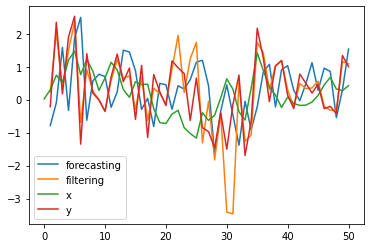

In [19]:
plt.plot(np.arange(1,len(x)),np.random.normal(mu_old,sigma_old),label="forecasting")
plt.plot(np.arange(1,len(x)),np.random.normal(mu_new,sigma_new),label="filtering")
plt.plot(np.arange(0,len(x)),x,label="x")
plt.plot(np.arange(1,len(x)),y,label="y")
plt.legend()

plt.show()

**Problem 3**

1- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=2}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return Z. Here, ``N = 50`` is the default value.

In [20]:
def Trap(a,b,f,N=50):
    H=(b-a)/(N-1)
    x=np.linspace(a,b,N)
    Z=0
    for i in range(1,N):
        Z=Z+H*(f(x[i-1])+f(x[i]))/2
    return Z

2- Let $m_k$  be the midpoint of the subinterval $[x_k,x_{k+1}]$ for all $k=1,\cdots,N-1$, we have 

$$\int_a^bf(x)dx \approx \sum_{m_k} f(m_{k})H = W$$

Write a function named <b>Mid</b> that takes $a,b,N, f$ as inputs and return W. Here, ``N = 50`` is the default value.

In [21]:
def Mid(a,b,f,N=50):
    H=(b-a)/(N-1)
    x=np.linspace(a,b,N)
    W=0
    for i in range(N-1):
        m=(x[i]+x[i+1])/2
        W=W+H*f(m)
    return W

3- Using **Trap, Mid** and python inbuilt function **quad**, compute and display the integral 

$$A = \int_0^{\sqrt{\ln(2)}}xe^{x^2}dx$$

In [22]:
F=lambda x: x*np.exp(x**2)
Aq=quad(F,0,np.log(2)**0.5)[0]
print("WITH QUAD A=",Aq)
print("WITH Trap A=",Trap(0,(np.log(2))**0.5,F))
print("WITH Mid A=",Mid(0,(np.log(2))**0.5,F,1000000))

WITH QUAD A= 0.4999999999999998
WITH Trap A= 0.5000907539443507
WITH Mid A= 0.49999999999989386


4- After computing the exact value of $A$, write a Python program that searches for the minimun values $N_{Trap}, N_{Mid}$ less than 10000 such that **Trap, Mid**, respectively, give a better approximation of $A$ then **quad**.  If any the value  $ N_{Trap}, N_{Mid}$ doesn't exist your program should print the string **No $N_{Trap}$ found** or **No $N_{Mid}$ found**, respectively.

In [23]:

Nt=9800
Et=abs(0.5-Trap(0,(np.log(2))**0.5,F,Nt))
while Nt<10000 and Et>=abs(0.5-Aq):
    Nt+=1
    Et=abs(0.5-Trap(0,(np.log(2))**0.5,F,Nt))
if Nt>=10000:
    print("No Ntrap Found")
else:
    print("N Trap=",Nt)

        
Nm=9800
Em=abs(0.5-Mid(0,(np.log(2))**0.5,F,Nm))
while Nm<10000 and Em>=abs(0.5-Aq):
    Nm+=1
    Em=abs(0.5-Mid(0,(np.log(2))**0.5,F,Nm))
if Nm>=10000:
    print("No N mid Found")
else:
    print("N Mid=",Nm)


No Ntrap Found
No N mid Found


**Problem 4**

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_1<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_0,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_0)& x_2(t_0)&\cdots& x_{M}(t_0)\\
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [24]:
def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    N=len(t)-1
    M=len(c)
    z = np.ones((N+1, M))
    z[0] = c
    for i in range(N):
        z[i+1]=z[i]+H*f(z[i],t[i])
    return z
    

2. Write a python function <b> RalstonOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the Ralston method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+\dfrac{2}{3}Hk_1, t_k + \dfrac{2}{3}H),\\\\
z_{k+1} = z_k + H(\dfrac{1}{4}k_1+\dfrac{3}{4}k_2)
\end{cases}
\end{equation}


In [25]:
def RalstonOdeSys (f,c,t):
    H = t[1] - t[0]
    z = np.ones((len(t), len(c)))
    z[0] = c
    
    for k in range(len(t) - 1):
        k1 = f(z[k], t[k])
        k2 = f(z[k]+ (H*(2*k1/3)), t[k] + (2*H/3))
        z[k+1] = z[k] + H*(1/4*k1+3/4*k2)
    return z

**Problem 5**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + \dfrac{d y}{dx}-6y = 0 \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=0 , y(a) = 1
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g(x) = \dfrac{3}{5}e^{2x}+ \dfrac{2}{5}e^{-3x}$ is the exact solution. Let us denote $e_k = \mid g_k - y_k\mid$

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,N$ (with $N= 100$ as default value) and return array of all $x_k$, $y_k$, $g_k$ and $e_k$.


In [26]:
def f(U,x):
    y,z = U
    dydx = z
    dzdx = -z+6*y
    return np.array([dydx,dzdx])

def SODE(a,b,N=100):
    # initial condition
    c = [1,0]
    
    # syst of odes
  

    # time points
    x = np.linspace(a,b,N+1)
    u = odeint(f,c,x)
    g=lambda x:3/5*np.exp(2*x)+2/5*np.exp(-3*x)
    E=abs(u[:,0]-g(x))
    return x, u[:,0],g(x),E

2- Using **SODE**, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

y= [ 1.          1.00119228  1.00474041  1.01060619  1.01875767  1.02916894
  1.04182002  1.05669662  1.07379002  1.09309695  1.11461947  1.13836486
  1.16434554  1.19257899  1.22308771  1.25589914  1.29104568  1.32856462
  1.36849814  1.41089334  1.45580224  1.5032818   1.55339395  1.60620566
  1.66178899  1.72022116  1.78158464  1.84596721  1.91346212  1.98416813
  2.05818972  2.13563714  2.21662663  2.30128053  2.38972748  2.48210257
  2.57854756  2.67921107  2.78424883  2.89382383  3.00810667  3.12727573
  3.25151747  3.38102672  3.51600699  3.65667073  3.80323971  3.95594534
  4.11502904  4.28074259  4.45334855  4.63312066  4.82034428  5.01531682
  5.21834823  5.42976144  5.64989296  5.87909331  6.11772764  6.3661763
  6.62483542  6.89411756  7.17445235  7.46628719  7.77008795  8.08633971
  8.41554754  8.7582373   9.11495648  9.48627506  9.87278645 10.27510841
 10.69388403 11.1297828  11.58350162 12.05576595 12.54733097 13.05898277
 13.59153962 14.14585325 14.72281027 15.3233335  

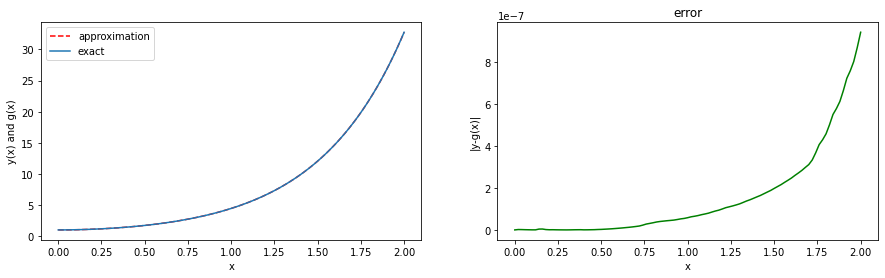

In [27]:
a=0
b=2

x,y1,g,e=SODE(a,b)
print("y=",y1)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x,y1,"r--",label="approximation")
plt.plot(x,g,label="exact")
plt.xlabel("x")
plt.ylabel("y(x) and g(x)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,e,"g")
plt.xlabel("x")
plt.ylabel("|y-g(x)|")
plt.title("error")
plt.show()

3- Using <b> RalstonOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

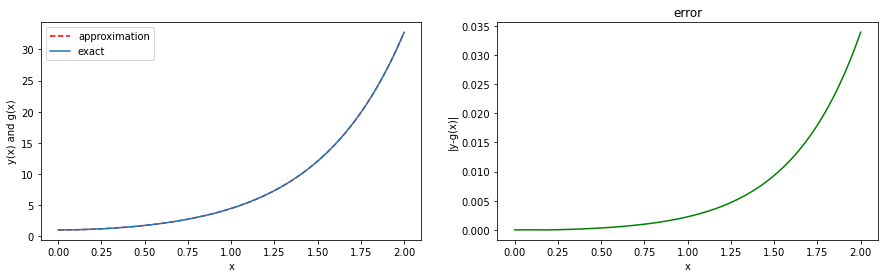

In [28]:
c=np.array([1,0])

N=100

U= RalstonOdeSys(f,c,x)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x,U[:,0],"r--",label="approximation")
plt.plot(x,g,label="exact")
plt.xlabel("x")
plt.ylabel("y(x) and g(x)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,abs(U[:,0]-g),"g")
plt.xlabel("x")
plt.ylabel("|y-g(x)|")
plt.title("error")
plt.show()

4- Using <b> EulerOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

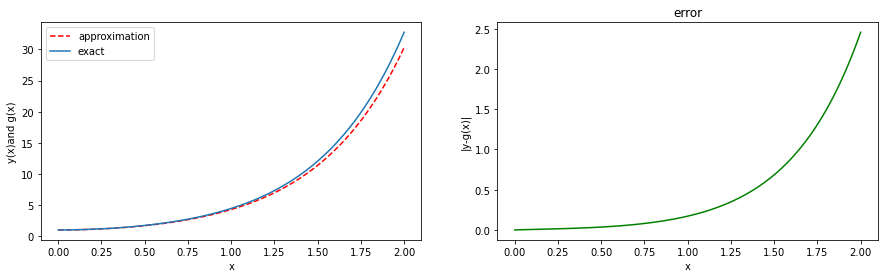

In [29]:
c=np.array([1,0])

N=100

v= EulerOdeSys(f,c,x)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x,v[:,0],"r--",label="approximation")
plt.plot(x,g,label="exact")
plt.xlabel("x")
plt.ylabel("y(x)and g(x)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x,abs(v[:,0]-g),"g")
plt.xlabel("x")
plt.ylabel("|y-g(x)|")
plt.title("error")
plt.show()

5- The L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$


Write a function called **L2_error** that takes $a,b,H$ and return the L2 error between $g_k$ and the approximate solution $y_k$ obtained using **SODEt**, **RalstonOdeSys** and **EulerOdeSys**.

In [30]:
def L2_error(a,b,H):
    N=int((b-a)/H)
    x,ysod,g,e = SODE(a,b,N)
    yral = RalstonOdeSys(f,c,x)
    yeul = EulerOdeSys(f,c,x)
    g=3/5*np.exp(2*x)+2/5*np.exp(-3*x)

    L2Er_SODE = (H*(ysod - g)**2)
    L2Er_Rals = (H*(yral[:,0] - g)**2)
    L2Er_Euler = (H*(yeul[:,0] - g)**2)
    return np.array([sum(L2Er_SODE), sum(L2Er_Rals),sum(L2Er_Euler)])

6- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Using **SODE**, **RalstonOdeSys** and **EulerOdeSys**, compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [31]:
Hj = np.array([10**-1,10**-2,10**-3,10**-4])
L2Erj =np.zeros((4,3))
for i in range(len(Hj)):
    L2Erj[i]=L2_error(0,2,Hj[i])
print("Error sode",L2Erj[:,0])
print("Error Ralston ",L2Erj[:,1])
print("Error Euler",L2Erj[:,2])

Error sode [1.87003021e-13 1.35459618e-13 1.30086659e-13 1.74517796e-13]
Error Ralston  [1.38218605e-01 1.48156369e-05 1.48796391e-09 1.48856117e-13]
Error Euler [2.43626982e+01 3.23553264e-01 3.34389331e-03 3.35510602e-05]


7- For each method **SODE**, **RalstonOdeSys** and **EulerOdeSys**, plot in the same graph $log(L2Er_j)$ vs $log(H_j)$.

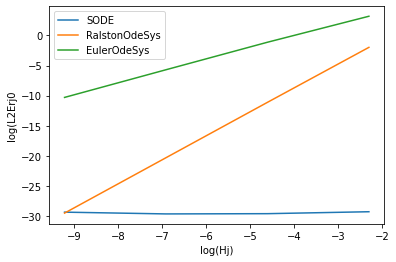

In [32]:

plt.plot(np.log(Hj),np.log(L2Erj[:,0]),label="SODE")

plt.plot(np.log(Hj),np.log(L2Erj[:,1]),label="RalstonOdeSys")

plt.plot(np.log(Hj),np.log(L2Erj[:,2]),label="EulerOdeSys")
plt.xlabel('log(Hj)')
plt.ylabel('log(L2Erj0')
plt.legend()
plt.show()

8- By assuming that $log(H_j)$ is the explanatory variable of $log(L2Er_j)$, complete the simple linear regression in the case of  **RalstonOdeSys**, **EulerOdeSys** and display the regression coeficient.

Note: Use the whole data to train your linear model.

In [37]:
dic = {'LogHj':np.log(Hj),
      'RalstonOdeSys': np.log(L2Erj[:,1]),'EulerOdeSys' : np.log(L2Erj[:,2]) }

df = pd.DataFrame(dic)
# Create linear regression object
Single_lr1= LinearRegression()
Single_lr2= LinearRegression()
X=df.LogHj.values.reshape(-1, 1) # independent variable
Y1=df.RalstonOdeSys.values.flatten() # dependent variable
Y2=df.EulerOdeSys.values.flatten() # dependent variable
Single_lr1.fit(X, Y1)
Single_lr2.fit(X, Y2)
# get the value of alpha and beta
alpha1 = Single_lr1.coef_
beta1 = Single_lr1.intercept_
alpha2 = Single_lr2.coef_
beta2 = Single_lr2.intercept_
# print the value of alpha and beta
print("The regression coefficient of the Log of Error against method")
print('alpha_RalstonOdeSys= ', alpha1[0])
print('beta_RalstonOdeSys = ', beta1)
print('alpha_EulerOdeSys = ', alpha2[0])
print('beta_EulerOdeSys = ', beta2)

The regression coefficient of the Log of Error against method
alpha_RalstonOdeSys=  3.9901527379846207
beta_RalstonOdeSys =  7.229065656161735
alpha_EulerOdeSys =  1.956875078819168
beta_EulerOdeSys =  7.780078485097798


**Problem 6**

1-The cost of admission to the world cup 2022 game is
- 320 USD for 3 children, 1 female  and 1 male 
- 600 USD  for 4 females and 2 males 
- 600 USD  for 5 children, 2 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

Let by
- x the cost for the children,
- y the cost for the females,
- z the cost for the males 
 
 we have:
  
\begin{equation}
\begin{cases}
    3x+y+z=320\\
    4y+2z=600\\
    5x+2y+2z=600
\end{cases}
\end{equation}


2- Write a Python code to compute and display how much is the admission for each child, female and male?

In [34]:
h=np.array([[3,1,1],[0,4,2],[5,2,2]])
k=np.array([320,600,600])
m=np.linalg.solve(h,k)
print("The cost for children is:",round(m[0]),"USD","\nThe cost for females is:",round(m[1]),"USD",
      "\nThe cost for males is:",round(m[2]),"USD")

The cost for children is: 40 USD 
The cost for females is: 100 USD 
The cost for males is: 100 USD


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    e^{x^2} + x = sin(y)\\
    2e^x + cos(y)= 2
\end{cases}
\end{equation}


In [35]:
def sys(z):
    x=z[0]
    y=z[1]
    
    f=np.zeros(2)
    f[0]=np.exp(x**2)+x-np.sin(y)
    f[1]=2*np.exp(x)+np.cos(y)-2
    return  f
guess=np.array([1,1])
z=fsolve(sys,guess)
print("x=",z[0])
print("y=",z[1])

x= -0.3793915333122747
y= -5.395803917749443


In [ ]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

def MatGenerator(a,b,alp,lam,beta,N,g):
    H=(b-a)/N
    global x
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B[0]=alp
    B[N]=beta
    B[1:N]=(H**2/lam**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-1
    A[N-1,N]=-1
    A[1:N,1:N]=-np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    return A,B

In [ ]:
g=lambda x: -4*(1+x)*np.exp(x)
a=0
b=1
alp=-4
lam=1
beta=0
N=100
A,B=MatGenerator(a,b,alp,lam,beta,N,g)
U=np.linalg.solve(A,B)
print(U)
plt.plot(x,U)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$U_{app}(x)$")
plt.title("Apprioximation")
plt.show()

In [ ]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()


In [ ]:
X, V  = np.meshgrid(np.linspace(-5.0, 5.0, 26), np.linspace(-5.0, 5.0, 26))


dxdt = V
dvdt = -np.sin(X)

plt.streamplot(X, V, dxdt, dvdt)
plt.axis('square')
plt.axis([-6, 6, -6, 6])
plt.title("Phase diagram")
plt.xlabel("x")
plt.ylabel("$\dotx$")
plt.show()


In [ ]:
def f(z,t):
    x,y=z
    dxdt=3*x-2*y
    dydt=2*x-2*y
    return np.array([dxdt,dydt])


def eulermodif(f,c,t):
    H = t[1] - t[0]
    z = np.ones((len(t), len(c)))
    z[0] = c
    
    for k in range(len(t) - 1):
        k1 = H*f(z[k], t[k])
        k2 = H*f(z[k]+ k1, t[k] + H)
        z[k+1] = z[k] + 1/2*(k1+k2)
    return z

N=100
c=[1,0]
t=np.linspace(0,1,N+1)

#exact solution
x=lambda t: 4/3*np.exp(2*t)-1/3*np.exp(-t)
y=lambda t:  2/3*np.exp(2*t)-2/3*np.exp(-t)


plt.figure(figsize=(15,4))

sol=eulermodif (f,c,t)
plt.subplot(1,2,1)
plt.plot(t,sol[:,0],"r--",label="approximation")
plt.plot(t,x(t),label="exact")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,sol[:,1],"r--",label="approximation")
plt.plot(t,y(t),label="exact")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()